In [69]:
!pip install tensorflow --upgrade

**Importing The Required Libraries**

In [3]:
import tensorflow 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.optimizers import Adam 
from keras.utils import np_utils 
import numpy

**Loading The Data**

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Analyzing The Data**

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

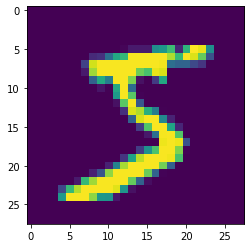

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

**Reshaping The Data**

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

**Applying One Hot Encoding**

In [10]:
number_of_classes = 10 
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Model Building

**Add CNN Layers**

In [12]:
model = Sequential()
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

**Compiling The Model**

In [13]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

**Train The Model**

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2138 - accuracy: 0.9507 - val_loss: 0.0898 - val_accuracy: 0.9739
Epoch 2/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0685 - accuracy: 0.9787 - val_loss: 0.0928 - val_accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0842 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.1077 - val_accuracy: 0.9784


**Observing The Metrics**

In [15]:
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.10766561329364777, 0.9783999919891357]


**Test The Model**

In [16]:
prediction=model.predict(X_test[:4]) 
print (prediction)

1/1 [==============================] - 0s 74ms/step
[[9.0363664e-14 4.3409436e-17 3.7888363e-11 1.1278523e-06 1.3747184e-20
  3.4510935e-17 5.2341975e-18 9.9999893e-01 1.4232749e-13 1.7265907e-12]
 [6.0411393e-13 2.3662043e-13 1.0000000e+00 4.4191466e-15 7.8290759e-18
  1.0474717e-22 3.3434885e-10 1.2791090e-20 5.7379210e-15 2.1934132e-20]
 [1.4469706e-06 9.9997020e-01 2.4161768e-06 1.2123384e-08 2.0045765e-05
  5.8172742e-09 2.1405709e-08 6.5634316e-09 5.8073497e-06 4.3427417e-09]
 [1.0000000e+00 9.8236786e-19 7.1321217e-12 3.2512065e-14 1.1582118e-15
  3.1793046e-14 2.6110333e-10 1.4215677e-16 4.0094074e-11 5.2036028e-11]]


In [17]:
import numpy as np
print (np.argmax(prediction, axis=1))
print (y_test[:4]) 

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Observing The Metrics**

In [18]:
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.10766561329364777, 0.9783999919891357]


**Test The Model**

In [19]:
prediction=model.predict(X_test[:4]) 
print (prediction)

1/1 [==============================] - 0s 25ms/step
[[9.0363664e-14 4.3409436e-17 3.7888363e-11 1.1278523e-06 1.3747184e-20
  3.4510935e-17 5.2341975e-18 9.9999893e-01 1.4232749e-13 1.7265907e-12]
 [6.0411393e-13 2.3662043e-13 1.0000000e+00 4.4191466e-15 7.8290759e-18
  1.0474717e-22 3.3434885e-10 1.2791090e-20 5.7379210e-15 2.1934132e-20]
 [1.4469706e-06 9.9997020e-01 2.4161768e-06 1.2123384e-08 2.0045765e-05
  5.8172742e-09 2.1405709e-08 6.5634316e-09 5.8073497e-06 4.3427417e-09]
 [1.0000000e+00 9.8236786e-19 7.1321217e-12 3.2512065e-14 1.1582118e-15
  3.1793046e-14 2.6110333e-10 1.4215677e-16 4.0094074e-11 5.2036028e-11]]


In [20]:
import numpy as np
print (np.argmax(prediction, axis=1))
print (y_test[:4]) 

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Save The Model**

In [21]:
model.save('models/mnistCNN.h5')

In [22]:
cd models

/home/wsuser/work/models


In [23]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [24]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


## IBM Cloud Deployment

In [25]:
!pip install -U ibm-watson-machine-learning

In [26]:
from ibm_watson_machine_learning import APIClient
import json

## Authenticatin and Set Space

In [27]:
wml_credentials = {
    "apikey":"FalOWyUPBezRK0SkymfM9NMw-bwmYyfx483mV6CSn31m",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [28]:
wml_client = APIClient(wml_credentials)

In [30]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------  ------------------------
ID                                    NAME                         CREATED
0794553b-95bf-4c50-b1bc-31cf1366f404  HandwrittenDigitRecognition  2022-11-18T13:26:32.626Z
------------------------------------  ---------------------------  ------------------------


In [31]:
SPACE_ID = "0794553b-95bf-4c50-b1bc-31cf1366f404"

In [32]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [33]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## Save and Deploy the Model

In [34]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9ee284340251017a2266a70b0914bdd8cc3d8c0524396df82d9a68ebb74d63a2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [35]:
import sklearn
sklearn.__version__

'1.0.2'

In [36]:
MODEL_NAME = 'HandwrittenDigitRecognition'
DEPLOYMENT_NAME = 'HandwrittenDigitRecognition'
DEMO_MODEL = model

In [62]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [79]:
model_details = wml_client.repository.store_model(model='hdr_deployment.tgz',
    meta_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T14:37:03.509Z',
  'id': '568330d7-7a28-43d7-84c2-07b4d00426f4',
  'modified_at': '2022-11-18T14:37:06.047Z',
  'name': 'HandwrittenDigitRecognition',
  'owner': 'IBMid-6780003QUT',
  'resource_key': '3e9ed91c-e3e2-4958-9367-0502a41c1fc4',
  'space_id': '0794553b-95bf-4c50-b1bc-31cf1366f404'},
 'system': {'warnings': []}}

In [73]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'568330d7-7a28-43d7-84c2-07b4d00426f4'

In [76]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}
deployment_props

{'name': 'HandwrittenDigitRecognition', 'online': {}}

In [77]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '568330d7-7a28-43d7-84c2-07b4d00426f4' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
..
failed

--------------------------
Deployment creation failed
--------------------------


Keras model load failed with error: Unknown optimizer: Custom>Adam. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


WMLClientError: Deployment creation failed for deployment id: 54bb260e-fb8b-44cc-b6fb-8190d32a3982. Errors: [{'code': 'invalid_model_archive', 'message': 'Keras model load failed with error: Unknown optimizer: Custom>Adam. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.', 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]